In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from ema_workbench import (
    load_results,
    Policy,
    Scenario,
    MultiprocessingEvaluator
)

from ema_workbench.analysis import prim, parcoords
from ema_workbench.util import ema_logging, utilities

from custom_problem_formulation_no_RfR import get_model_for_problem_formulation

from sklearn.preprocessing import (MinMaxScaler)

In [3]:
combined_df = pd.read_csv("results/PRIM_scenarios.csv", index_col=0)
combined_df.head()

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model,composite_ooi
5666,104,40.525349,10.0,0.161001,187.789168,1.5,0.010373,205.979011,1.0,0.958783,...,0,0,0,0,0,0,5666,No Policy,dikesnet,3.851408
37006,112,45.942740,10.0,0.048710,140.411132,1.0,0.024664,82.938927,1.5,0.397429,...,0,0,0,0,0,0,37006,No Policy,dikesnet,3.842766
10872,124,40.037075,1.5,0.142803,341.756695,1.5,0.036182,77.097873,1.5,0.527626,...,0,0,0,0,0,0,10872,No Policy,dikesnet,3.806186
23514,8,71.302063,1.0,0.046825,345.456662,1.0,0.011393,30.957752,1.5,0.700170,...,0,0,0,0,0,0,23514,No Policy,dikesnet,3.743752
456,123,43.660903,10.0,0.199587,181.602356,1.0,0.058039,222.809776,1.5,0.212183,...,0,0,0,0,0,0,456,No Policy,dikesnet,3.716054


In [48]:
# First we test the final policy set, against each scenario, which remained after the PRIM analysis.

model, steps = get_model_for_problem_formulation()

final_policies = pd.read_csv('results/levers_final_policies.csv')
display(final_policies)
final_policies = final_policies[[l.name for l in model.levers]]



policies = []
for idx, row in final_policies.iterrows():
    policy_dict = row.to_dict()
    policy_name = idx
    policies.append(Policy(policy_name, **policy_dict))

# combined_df = pd.read_csv('results/combined_df.csv')    # NOG genereren
scenarios_df = combined_df[[u.name for u in model.uncertainties]]

scenarios = []
for idx, row in scenarios_df.iterrows():
    scenario_dict = row.to_dict()
    scenario_name = idx
    scenarios.append(Scenario(scenario_name, **scenario_dict))
scenarios.__len__()

,Unnamed: 0,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,...,A.2_DikeIncrease 2,A.3_DikeIncrease 0,A.3_DikeIncrease 1,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2
0,scenario5666_policy45,1,1,0,1,0,0,1,1,1,...,0,6,7,2,7,7,6,4,4,7
1,scenario5666_policy79,0,0,0,1,1,0,1,1,1,...,0,2,1,7,3,7,6,1,7,5
2,scenario5666_policy71,1,0,0,0,0,0,1,1,1,...,0,6,2,2,1,1,0,7,4,5
3,scenario5666_policy67,0,1,0,0,0,0,1,1,1,...,0,5,3,0,2,3,6,4,5,6


13013

In [46]:
policies

[Policy({'0_RfR 0': 1, '0_RfR 1': 1, '0_RfR 2': 0, '1_RfR 0': 1, '1_RfR 1': 0, '1_RfR 2': 0, '2_RfR 0': 1, '2_RfR 1': 1, '2_RfR 2': 1, '3_RfR 0': 1, '3_RfR 1': 1, '3_RfR 2': 1, '4_RfR 0': 1, '4_RfR 1': 0, '4_RfR 2': 0, 'EWS_DaysToThreat': 3, 'A.1_DikeIncrease 0': 0, 'A.1_DikeIncrease 1': 0, 'A.1_DikeIncrease 2': 0, 'A.2_DikeIncrease 0': 7, 'A.2_DikeIncrease 1': 0, 'A.2_DikeIncrease 2': 0, 'A.3_DikeIncrease 0': 6, 'A.3_DikeIncrease 1': 7, 'A.3_DikeIncrease 2': 2, 'A.4_DikeIncrease 0': 7, 'A.4_DikeIncrease 1': 7, 'A.4_DikeIncrease 2': 6, 'A.5_DikeIncrease 0': 4, 'A.5_DikeIncrease 1': 4, 'A.5_DikeIncrease 2': 7}),
 Policy({'0_RfR 0': 0, '0_RfR 1': 0, '0_RfR 2': 0, '1_RfR 0': 1, '1_RfR 1': 1, '1_RfR 2': 0, '2_RfR 0': 1, '2_RfR 1': 1, '2_RfR 2': 1, '3_RfR 0': 1, '3_RfR 1': 1, '3_RfR 2': 1, '4_RfR 0': 0, '4_RfR 1': 1, '4_RfR 2': 1, 'EWS_DaysToThreat': 3, 'A.1_DikeIncrease 0': 0, 'A.1_DikeIncrease 1': 2, 'A.1_DikeIncrease 2': 0, 'A.2_DikeIncrease 0': 7, 'A.2_DikeIncrease 1': 0, 'A.2_DikeIncre

In [9]:
# # n_scenarios =  1000

# with MultiprocessingEvaluator(model) as evaluator:
#             results = evaluator.perform_experiments(scenarios, policies)

100%|██████████████████████████████████| 52052/52052 [2:04:51<00:00,  6.95it/s]


In [11]:
# Saving the results
# utilities.save_results(results, 'results/final_policies_13013_scenarios.tar.gz')

In [59]:
# Load the results
results = utilities.load_results('results/final_policies_13013_scenarios.tar.gz')

In [60]:
experiments, outcomes = results
experiments.shape

(52052, 53)

In [61]:
experiments[experiments['scenario'] == 5666]

,discount rate 0,discount rate 1,discount rate 2,A.0_ID flood wave shape,A.1_Bmax,A.1_pfail,A.1_Brate,A.2_Bmax,A.2_pfail,A.2_Brate,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,1.5,1.5,1.5,104,40.525349,0.161001,10.0,187.789168,0.010373,1.5,...,2,7,7,6,4,4,7,5666,0,dikesnet
13013,1.5,1.5,1.5,104,40.525349,0.161001,10.0,187.789168,0.010373,1.5,...,7,3,7,6,1,7,5,5666,1,dikesnet
26026,1.5,1.5,1.5,104,40.525349,0.161001,10.0,187.789168,0.010373,1.5,...,2,1,1,0,7,4,5,5666,2,dikesnet
39039,1.5,1.5,1.5,104,40.525349,0.161001,10.0,187.789168,0.010373,1.5,...,0,2,3,6,4,5,6,5666,3,dikesnet


In [62]:
experiments_sliced = experiments.iloc[:,:19]
experiments_sliced

,discount rate 0,discount rate 1,discount rate 2,A.0_ID flood wave shape,A.1_Bmax,A.1_pfail,A.1_Brate,A.2_Bmax,A.2_pfail,A.2_Brate,A.3_Bmax,A.3_pfail,A.3_Brate,A.4_Bmax,A.4_pfail,A.4_Brate,A.5_Bmax,A.5_pfail,A.5_Brate
0,1.5,1.5,1.5,104,40.525349,0.161001,10.0,187.789168,0.010373,1.5,205.979011,0.958783,1.0,340.402481,0.086792,1.0,75.494126,0.826855,1.5
1,1.5,1.5,1.5,112,45.942740,0.048710,10.0,140.411132,0.024664,1.0,82.938927,0.397429,1.5,165.980273,0.508447,1.5,56.341554,0.122571,10.0
2,1.5,1.5,1.5,124,40.037075,0.142803,1.5,341.756695,0.036182,1.5,77.097873,0.527626,1.5,141.342538,0.095311,1.0,139.803767,0.085544,1.0
3,1.5,1.5,1.5,8,71.302063,0.046825,1.0,345.456662,0.011393,1.0,30.957752,0.700170,1.5,211.891661,0.370382,10.0,233.845859,0.080897,1.0
4,2.5,1.5,1.5,123,43.660903,0.199587,10.0,181.602356,0.058039,1.0,222.809776,0.212183,1.5,213.479276,0.059368,1.5,322.273857,0.825302,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52047,3.5,1.5,3.5,94,331.168259,0.348061,1.5,289.915138,0.735999,1.5,188.403412,0.225255,10.0,120.011611,0.538490,1.5,305.147646,0.399498,10.0
52048,1.5,3.5,4.5,9,304.130009,0.346508,10.0,183.835119,0.674772,1.0,122.234986,0.174207,10.0,337.991778,0.609534,10.0,151.260880,0.582093,10.0
52049,2.5,3.5,2.5,51,82.911645,0.345628,1.0,305.490519,0.946479,10.0,135.541766,0.504624,10.0,299.622715,0.295493,1.5,54.326754,0.369154,1.5
52050,3.5,4.5,3.5,51,248.465616,0.341540,10.0,340.138214,0.313503,10.0,81.810139,0.344787,1.0,274.362596,0.277257,10.0,182.051197,0.176697,10.0


In [63]:
df_outcomes = pd.DataFrame(outcomes)
df_outcomes

,A.1_External Costs,A.1_Expected Number of Deaths,A.1_Expected Annual Damage,A.2_External Costs,A.2_Expected Number of Deaths,A.2_Expected Annual Damage
0,0,0.000000,0.000000e+00,7.331545e+07,0.001637,1.926591e+07
1,0,0.002254,3.974627e+07,7.331545e+07,0.000000,0.000000e+00
2,0,0.000000,0.000000e+00,7.331545e+07,0.000000,0.000000e+00
3,0,0.002254,3.974627e+07,7.331545e+07,0.001027,1.222889e+07
4,0,0.000000,0.000000e+00,7.331545e+07,0.000000,0.000000e+00
...,...,...,...,...,...,...
52047,71223146,0.000000,0.000000e+00,5.335857e+07,0.000000,0.000000e+00
52048,71223146,0.000000,0.000000e+00,5.335857e+07,0.000000,0.000000e+00
52049,71223146,0.000000,0.000000e+00,5.335857e+07,0.000000,0.000000e+00
52050,71223146,0.000000,0.000000e+00,5.335857e+07,0.000000,0.000000e+00


In [73]:
df_final = experiments[['policy']]
df_final = df_final.join(df_outcomes)
df_final = df_final.set_index('policy')
policy_dict = {0: 45, 1: 79, 2: 71, 3: 67}
df_final.rename(index=policy_dict, inplace=True)

df_final

,A.1_External Costs,A.1_Expected Number of Deaths,A.1_Expected Annual Damage,A.2_External Costs,A.2_Expected Number of Deaths,A.2_Expected Annual Damage
policy,,,,,,
45,0,0.000000,0.000000e+00,7.331545e+07,0.001637,1.926591e+07
45,0,0.002254,3.974627e+07,7.331545e+07,0.000000,0.000000e+00
45,0,0.000000,0.000000e+00,7.331545e+07,0.000000,0.000000e+00
45,0,0.002254,3.974627e+07,7.331545e+07,0.001027,1.222889e+07
45,0,0.000000,0.000000e+00,7.331545e+07,0.000000,0.000000e+00
...,...,...,...,...,...,...
67,71223146,0.000000,0.000000e+00,5.335857e+07,0.000000,0.000000e+00
67,71223146,0.000000,0.000000e+00,5.335857e+07,0.000000,0.000000e+00
67,71223146,0.000000,0.000000e+00,5.335857e+07,0.000000,0.000000e+00


In [74]:
limits = parcoords.get_limits(df_final)
limits.loc[0, ['A.1_External Costs', 'A.1_Expected Number of Deaths',	'A.1_Expected Annual Damage', 'A.2_External Costs',	'A.2_Expected Number of Deaths', 'A.2_Expected Annual Damage']] = 0

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(df_final)
plt.show()

KeyboardInterrupt: 

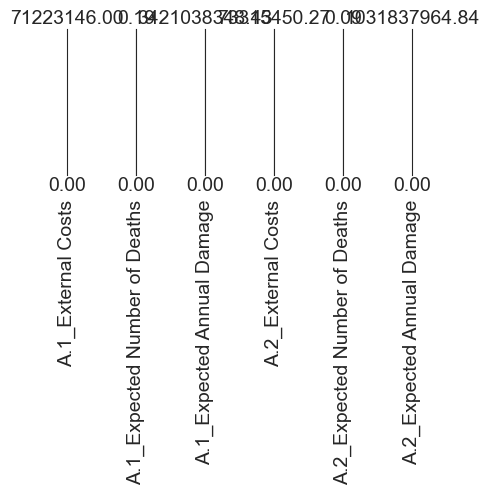

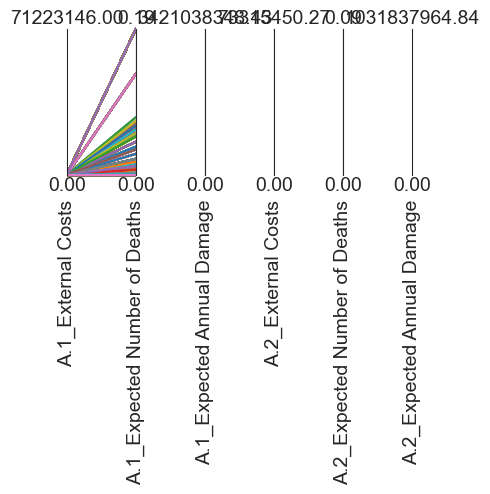

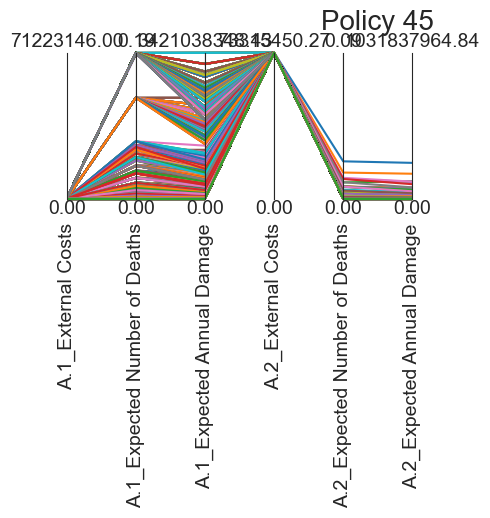

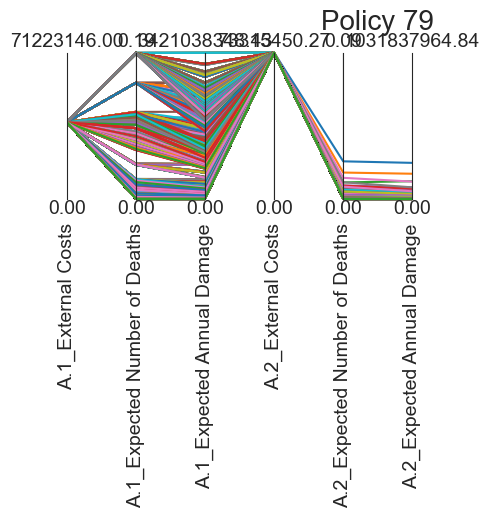

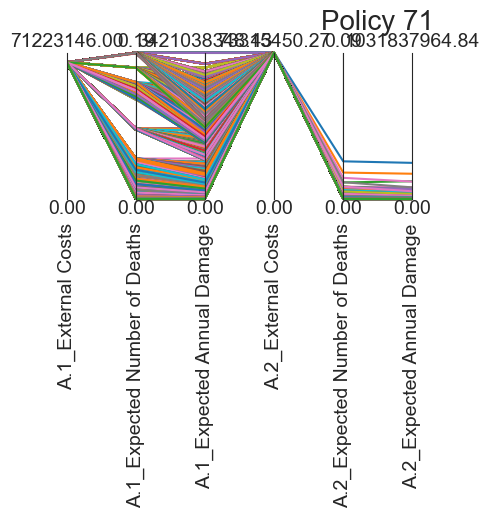

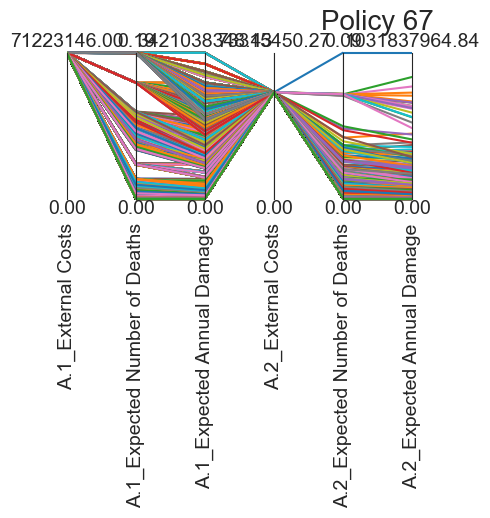

In [75]:
# Get unique indexes in the DataFrame
unique_indexes = df_final.index.unique()

# Get the limits for the parallel coordinate plots
limits = parcoords.get_limits(df_final)
limits.loc[0, ['A.1_External Costs', 'A.1_Expected Number of Deaths',	'A.1_Expected Annual Damage', 'A.2_External Costs',	'A.2_Expected Number of Deaths', 'A.2_Expected Annual Damage']] = 0

# Create a parallel coordinate plot for each unique index
for index in unique_indexes:
    rows = df_final.loc[df_final.index == index]

    # Create the parallel coordinate axes
    paraxes = parcoords.ParallelAxes(limits)

    # Plot the rows with the assigned color
    paraxes.plot(rows, label=str(index))

    # Display the legend
    plt.title(label= f'Policy {index}',
          fontsize=20,)
#     plt.savefig(f'figures/experiments{index}.png', bbox_inches='tight')
    # Display the plot
    plt.show()

In [25]:
# Set up the scaler to normalise the results
scaler = MinMaxScaler()
normalized_ooi = scaler.fit_transform(df_outcomes[['A.1_Expected Annual Damage', 'A.1_Expected Number of Deaths', 
                                                   'A.2_Expected Annual Damage', 'A.2_Expected Number of Deaths']])
composite_ooi = normalized_ooi.sum(axis=1)

# Add the composite ooi to the dataframe
df_outcomes['composite_ooi'] = composite_ooi 

In [26]:
df_outcomes.head()

,A.1_External Costs,A.1_Expected Number of Deaths,A.1_Expected Annual Damage,A.2_External Costs,A.2_Expected Number of Deaths,A.2_Expected Annual Damage,composite_ooi
0,0,0.000000,0.000000e+00,7.331545e+07,0.001637,1.926591e+07,0.037220
1,0,0.002254,3.974627e+07,7.331545e+07,0.000000,0.000000e+00,0.023228
2,0,0.000000,0.000000e+00,7.331545e+07,0.000000,0.000000e+00,0.000000
3,0,0.002254,3.974627e+07,7.331545e+07,0.001027,1.222889e+07,0.046719
4,0,0.000000,0.000000e+00,7.331545e+07,0.000000,0.000000e+00,0.000000


Threshold 0.50:
Threshold 0.55:
Threshold 0.60:
Threshold 0.65:
Threshold 0.70:
Threshold 0.75:
Threshold 0.80:
Threshold 0.85:
Threshold 0.90:


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


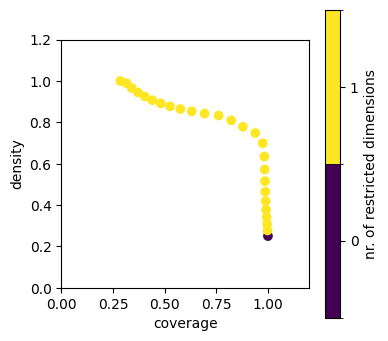

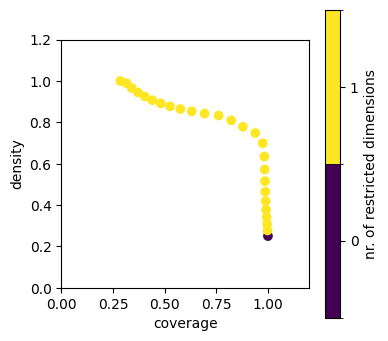

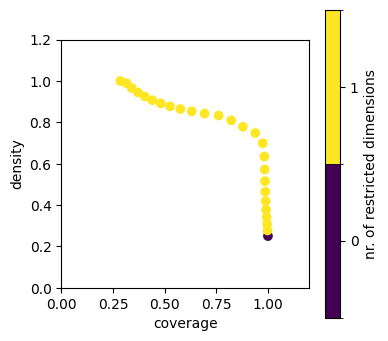

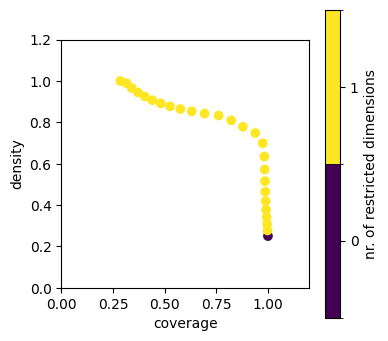

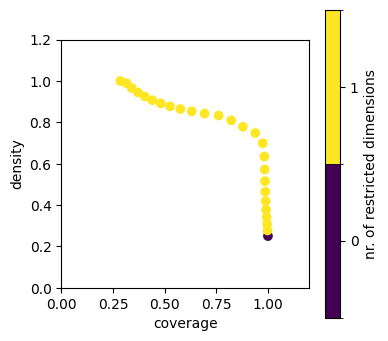

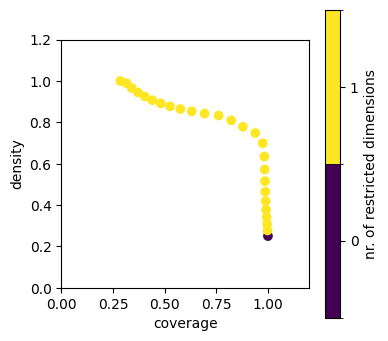

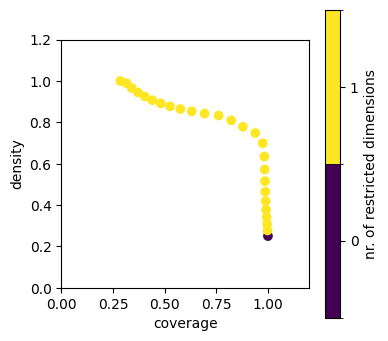

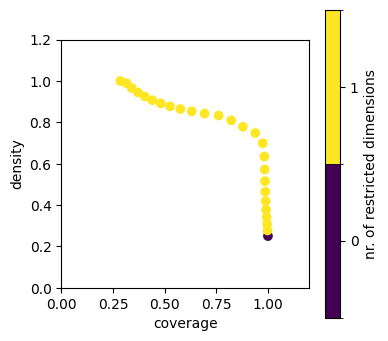

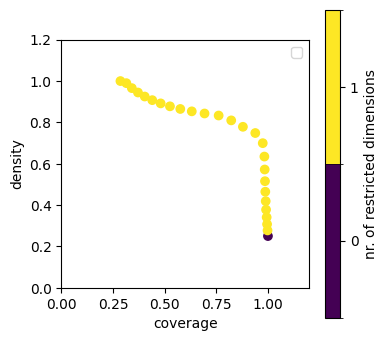

In [29]:
# To find the worst case scenarios, we will consider the worst 25% of the scenarios based on the composite ooi
percentile_composite_ooi = np.percentile(df_outcomes["composite_ooi"], 75)

# Bool the values if they are larger than the threshold
selval = pd.DataFrame()
selval = df_outcomes["composite_ooi"] > percentile_composite_ooi

# To find the most appliclable threshold for the PRIM algorithm (note that this is a different threshold than the composite_ooi threshold), 
# we will plot the trade-offs for different thresholds
# Create a list to store results
boxes = []
thresholds = np.arange(0.5, 0.95, 0.05)

# Run the PRIM algorithm for different thresholds
for threshold in thresholds:
    prim_alg = prim.Prim(experiments_sliced, selval, threshold=threshold, peel_alpha=0.1)
    box = prim_alg.find_box()
    boxes.append((threshold, box))

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams["figure.figsize"] = (4, 4)

# Plot trade-offs for different thresholds
for threshold, box in boxes:
    print(f'Threshold {threshold:.2f}:')
    box.show_tradeoff()

plt.legend()
plt.show()


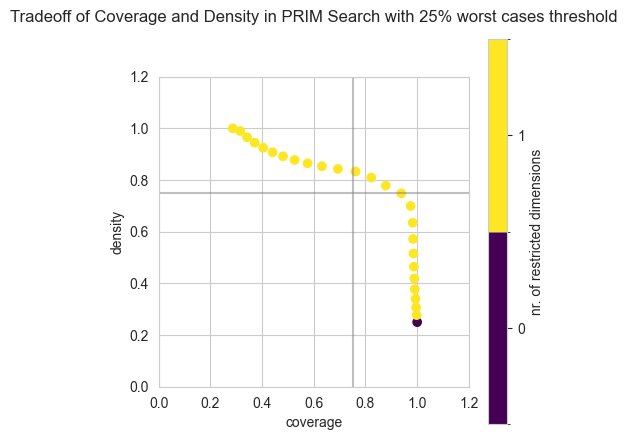

In [32]:
# For a reason we have to admit are unsure of, we pick a threshold of 0.9, as the graphs above indicate that it does not seem to affect to boxes PRIM finds
prim_alg = prim.Prim(experiments_sliced, selval, threshold=0.9, peel_alpha=0.1)
box1 = prim_alg.find_box()

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams["figure.figsize"] = (5,5)

sns.set_style('whitegrid')

# Show trade off plot
box1.show_tradeoff()
# We draw lines at 0.75 to more easily see if we can find a box which exceeds a coverage and density of 0.75
plt.hlines(y=[0.75], xmin=0, xmax=1.2, colors='grey', alpha=0.5)
plt.vlines(x=[0.75], ymin=0, ymax=1.2, colors='grey', alpha=0.5)
plt.title('Tradeoff of Coverage and Density in PRIM Search with 25% worst cases threshold', y=1.15)

plt.savefig("images/PRIM_tradeoff_scenarios")
plt.show()

In [33]:
box1.peeling_trajectory

,coverage,density,id,mass,mean,res_dim
0,1.000000,0.250000,0,1.000000,0.250000,0
1,0.998002,0.277239,1,0.899946,0.277239,1
2,0.995773,0.307382,2,0.809882,0.307382,1
3,0.993775,0.340854,3,0.728886,0.340854,1
4,0.990932,0.377665,4,0.655959,0.377665,1
5,0.989165,0.418901,5,0.590333,0.418901,1
6,0.987244,0.464596,6,0.531238,0.464596,1
7,0.985707,0.515472,7,0.478060,0.515472,1
8,0.984323,0.572035,8,0.430185,0.572035,1
9,0.982786,0.634627,9,0.387151,0.634627,1


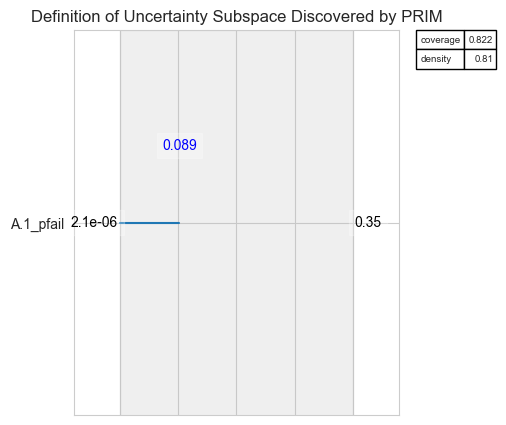

In [34]:
# Further inspecting box X to see which dimensions are being restricted
box1.select(13)
box1.inspect(style="graph", ticklabel_formatter='{}', boxlim_formatter='{:.2g}')
plt.title('Definition of Uncertainty Subspace Discovered by PRIM')
plt.savefig('images/scenario_discovery__prim_boundary.png')
plt.show()

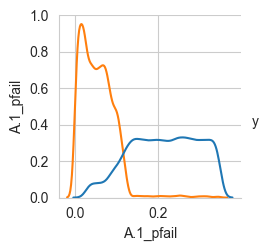

In [38]:
box1.show_pairs_scatter()
plt.savefig('images/prim_pairplot.png')
plt.show()

In [36]:
# Set the limits based on the PRIM box
limits = box1.box_lims[11]
limits

,discount rate 0,discount rate 1,discount rate 2,A.0_ID flood wave shape,A.1_Bmax,A.1_pfail,A.1_Brate,A.2_Bmax,A.2_pfail,A.2_Brate,A.3_Bmax,A.3_pfail,A.3_Brate,A.4_Bmax,A.4_pfail,A.4_Brate,A.5_Bmax,A.5_pfail,A.5_Brate
0,"{1.5, 2.5, 3.5}","{1.5, 2.5, 3.5, 4.5}","{1.5, 2.5, 3.5, 4.5}",0,30.062009,0.000002,"{1.5, 10.0, 1.0}",30.000705,0.000079,"{1.5, 10.0, 1.0}",30.015740,0.000265,"{1.0, 10.0, 1.5}",30.005383,0.000021,"{1.0, 10.0, 1.5}",30.006804,0.000042,"{1.5, 10.0, 1.0}"
1,"{1.5, 2.5, 3.5}","{1.5, 2.5, 3.5, 4.5}","{1.5, 2.5, 3.5, 4.5}",132,349.992790,0.109039,"{1.5, 10.0, 1.0}",349.999139,0.999938,"{1.5, 10.0, 1.0}",349.975759,0.999946,"{1.0, 10.0, 1.5}",349.995618,0.999946,"{1.0, 10.0, 1.5}",349.971418,0.999998,"{1.5, 10.0, 1.0}"
